<h1><center> Investigating Aperture Effects on Galaxy Mass Estimation <center></h1>
<center> An attempt to get the ${\rm H}\delta_{\rm A}$ and ${\rm D}_{n}4000$ values for a single galaxy as a function of radius: once we get this running, we can modularize everything! <center>

In [17]:
from __future__ import unicode_literals
import numpy as np
import scipy
from scipy.stats import binned_statistic
from scipy.stats import binned_statistic_2d
import scipy.interpolate as interp
import scipy.stats as st

#Notebook preferences
import warnings
warnings.filterwarnings('ignore')

import pickle
import os


import astropy as ap
from astropy.io import fits
from astropy import table as t
from astropy.table import Table
from astropy import wcs
from astropy.cosmology import WMAP9 as cosmo


import matplotlib.pyplot as plt
import matplotlib.patheffects as patheffects
from matplotlib import rcParams
from matplotlib.path import Path
import matplotlib.patches as patches
import matplotlib as mpl
from matplotlib import rc
from matplotlib import colors



#Plotting preferences
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Computer Modern Sans"]
rcParams["text.usetex"] = True
rcParams["text.latex.preamble"] = r"\usepackage{cmbright}"
rcParams['xtick.major.pad']='10'
rcParams['ytick.major.pad']='10'
rcParams['font.size'] = 22
rcParams['axes.labelsize'] = 22
rcParams['axes.labelweight'] = 'bold'
rcParams['axes.titlesize'] = 17
rcParams['xtick.labelsize'] = 17
rcParams['ytick.labelsize'] = 17
rcParams['legend.fontsize'] = 15
rcParams['figure.titlesize'] = 1

In [18]:
os.chdir("../fits_files")
dat2 = Table.read('manga-9890-12702-LOGCUBE.fits', format='fits')
drpall2 = t.Table.read('drpall-v2_5_3.fits')
drpall2.add_index('plateifu')
drpall2.loc['9890-12702']

drp_logcube2 = fits.open('manga-9890-12702-LOGCUBE.fits')
drpall2['plateifu'=='9890-12702']

plate,ifudsgn,plateifu,mangaid,versdrp2,versdrp3,verscore,versutil,versprim,platetyp,srvymode,objra,objdec,ifuglon,ifuglat,ifura,ifudec,ebvgal,nexp,exptime,drp3qual,bluesn2,redsn2,harname,frlplug,cartid,designid,cenra,cendec,airmsmin,airmsmed,airmsmax,seemin,seemed,seemax,transmin,transmed,transmax,mjdmin,mjdmed,mjdmax,gfwhm,rfwhm,ifwhm,zfwhm,mngtarg1,mngtarg2,mngtarg3,catidnum,plttarg,manga_tileid,nsa_iauname,ifudesignsize,ifutargetsize,ifudesignwrongsize,z,zmin,zmax,szmin,szmax,ezmin,ezmax,probs,pweight,psweight,psrweight,sweight,srweight,eweight,esweight,esrweight,nsa_field,nsa_run,nsa_camcol,nsa_version,nsa_nsaid,nsa_nsaid_v1b,nsa_z,nsa_zdist,nsa_sersic_absmag [7],nsa_elpetro_absmag [7],nsa_elpetro_amivar [7],nsa_sersic_mass,nsa_elpetro_mass,nsa_elpetro_ba,nsa_elpetro_phi,nsa_extinction [7],nsa_elpetro_th50_r,nsa_petro_th50,nsa_petro_flux [7],nsa_petro_flux_ivar [7],nsa_elpetro_flux [7],nsa_elpetro_flux_ivar [7],nsa_sersic_ba,nsa_sersic_n,nsa_sersic_phi,nsa_sersic_th50,nsa_sersic_flux [7],nsa_sersic_flux_ivar [7]
int64,bytes21,bytes11,bytes22,bytes6,bytes6,bytes6,bytes7,bytes4,bytes14,bytes12,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,bytes35,int64,bytes11,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64,int64,bytes19,int64,bytes19,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,bytes6,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
10001,12701,10001-12701,1-48157,v2_5_3,v2_5_3,v1_7_1,v5_5_33,v2_6,APOGEE-2&MaNGA,MaNGA dither,133.371090612,57.5984251446,159.27921887,38.8381829181,133.37109,57.598425,0.0545561,9,8100.81,0,20.2774,41.5828,ma079,22,3,9114,134.41357,57.604214,1.10715,1.15321,1.21404,1.78276,1.85945,2.13116,0.899192,0.930249,0.936709,57372,57373,57373,2.69856,2.64784,2.60184,2.54916,2080,0,0,1,plateTargets-1.par,6013,J085329.03+573554.9,127,127,0,0.0392074,0.0193562,0.0264775,0.0386959,0.0429176,0.0193562,0.0264775,0.748562,-999.0,0.665321,0.705378,1.08789,1.19925,-999.0,0.66562,0.705713,203,1350,6,v1_0_1,51226,-999,0.0392074,0.0395926,-16.2982 .. -19.5112,-16.2321 .. -19.5522,275.541 .. 452.944,3068010000.0,2685340000.0,0.417013,69.2463,0.448783 .. 0.0800664,5.16633,3.63987,12.7947 .. 413.049,3.26768 .. 0.000422625,13.8306 .. 425.941,3.03694 .. 0.00496838,0.335333,0.741845,68.2584,5.29184,14.8124 .. 412.19,2.50888 .. 0.0150605


In [19]:
drp_logcube2.info()

Filename: manga-9890-12702-LOGCUBE.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      75   ()      
  1  FLUX          1 ImageHDU       100   (74, 74, 4563)   float32   
  2  IVAR          1 ImageHDU        17   (74, 74, 4563)   float32   
  3  MASK          1 ImageHDU        17   (74, 74, 4563)   int32   
  4  DISP          1 ImageHDU        11   (74, 74, 4563)   float32   
  5  PREDISP       1 ImageHDU        11   (74, 74, 4563)   float32   
  6  WAVE          1 ImageHDU         9   (4563,)   float64   
  7  SPECRES       1 ImageHDU         9   (4563,)   float64   
  8  SPECRESD      1 ImageHDU         9   (4563,)   float64   
  9  PRESPECRES    1 ImageHDU         9   (4563,)   float64   
 10  PRESPECRESD    1 ImageHDU         9   (4563,)   float64   
 11  OBSINFO       1 BinTableHDU    148   9R x 65C   [25A, 17A, 5A, J, I, 8A, E, E, E, E, E, E, J, J, I, J, E, 12A, J, 8A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 13A

6661
(4563, 74, 74)
['XTENSION', 'BITPIX', 'NAXIS', 'NAXIS1', 'NAXIS2', 'NAXIS3', 'PCOUNT', 'GCOUNT', 'AUTHOR', 'VERSDRP2', 'VERSDRP3', 'VERSPLDS', 'VERSFLAT', 'VERSCORE', 'VERSPRIM', 'VERSUTIL', 'VERSIDL', 'BSCALE', 'BZERO', 'BUNIT', 'MASKNAME', 'TELESCOP', 'INSTRUME', 'SRVYMODE', 'PLATETYP', 'OBJSYS', 'EQUINOX', 'RADESYS', 'LAMPLIST', 'TPLDATA', 'NEXP', 'EXPTIME', 'BLUESN2', 'REDSN2', 'AIRMSMIN', 'AIRMSMED', 'AIRMSMAX', 'SEEMIN', 'SEEMED', 'SEEMAX', 'TRANSMIN', 'TRANSMED', 'TRANSMAX', 'MJDMIN', 'MJDMED', 'MJDMAX', 'DATE-OBS', 'MJDRED', 'DATERED', 'MNGTARG1', 'MNGTARG2', 'MNGTARG3', 'IFURA', 'IFUDEC', 'OBJRA', 'OBJDEC', 'CENRA', 'CENDEC', 'PLATEID', 'DESIGNID', 'IFUDSGN', 'FRLPLUG', 'PLATEIFU', 'CARTID', 'HARNAME', 'METFILE', 'MANGAID', 'CATIDNUM', 'PLTTARG', 'DRP3QUAL', 'IFUGLON', 'IFUGLAT', 'EBVGAL', 'GFWHM', 'RFWHM', 'IFWHM', 'ZFWHM', 'CTYPE3', 'CRPIX3', 'CRVAL3', 'CD3_3', 'CUNIT3', 'CRPIX1', 'CRPIX2', 'CRVAL1', 'CRVAL2', 'CD1_1', 'CD2_2', 'CTYPE1', 'CTYPE2', 'CUNIT1', 'CUNIT2', 'H

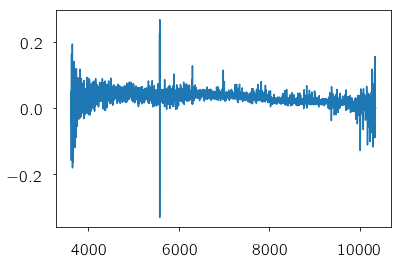

In [20]:
index = np.where(drpall2['srvymode']=='MaNGA dither')[0]
print(len(np.unique(drpall2['plateifu'][index])))
print(drp_logcube2['FLUX'].data.shape)
print(list(drp_logcube2['FLUX'].header.keys()))

print(drp_logcube2['FLUX'].data[:,17,17])
plt.plot(drp_logcube2['WAVE'].data, drp_logcube2['FLUX'].data[:,17,23])
plt.show()

In [21]:
def tsum(xin, yin):
    tsum = np.sum(np.abs((xin[1:]-xin[:-1]))*(yin[1:]+yin[:-1])/2. )
    return tsum

In [14]:
NL, NY, NX = drp_logcube2['FLUX'].data.shape
ting = ([[tsum(drp_logcube2['WAVE'].data, drp_logcube2['FLUX'].data[:,i,j]) 
          for j in range(NY)] for i in range(NX)])
#a = ([[get_dn4000(drp_logcube2['WAVE'].data, drp_logcube2['FLUX'].data[:,i,j]) for j in range(NY)] for i in range(NX)])
#b = ([[get_HdA(drp_logcube2['WAVE'].data, drp_logcube2['FLUX'].data[:,i,j]) for j in range(NY)] for i in range(NX)])

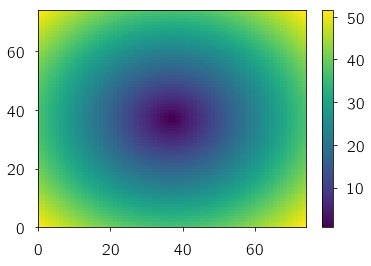

In [15]:
x_ax = np.arange(0, NX) + 0.5 - (NX/2.0)
y = np.outer((np.arange(0, NX) + 0.5) - (NX/2.0), np.ones(NX))
x = np.transpose(y)
s = np.sqrt((x*x+y*y))
plt.pcolormesh(s)
plt.colorbar()
plt.show()

2123


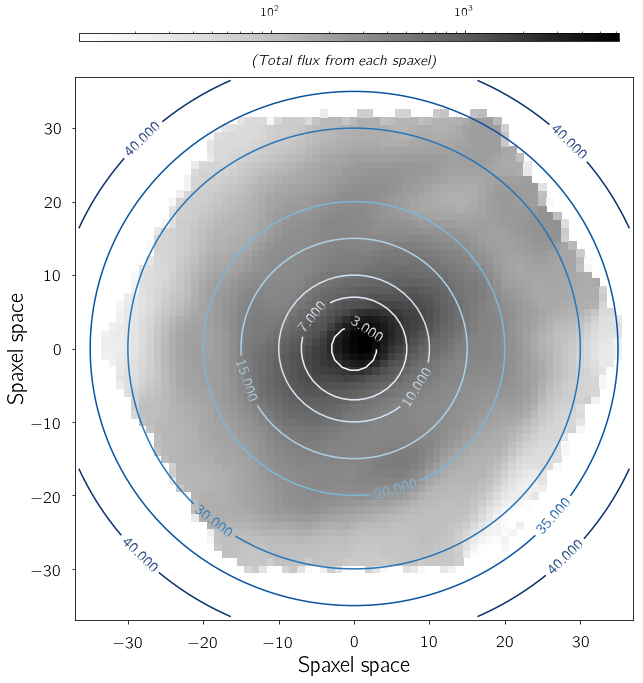

In [22]:
tings = np.ravel(ting)
print(len(tings[tings<=1]))
ting = np.array(ting)
number = np.ma.array(ting, mask = ting <= 10)


fig, ax = plt.subplots(1, 1, figsize = (10,10))
cs1 = ax.pcolormesh(x_ax,x_ax,number,norm = colors.LogNorm(), cmap = plt.cm.Greys)
l = [3.0, 7.0, 10.0, 15.0, 20.0, 30.0, 35.0, 40.0]
cs2 = ax.contour(x_ax,x_ax,s, levels = l, cmap = plt.cm.Blues)
plt.clabel(cs2, fontsize = 15)
plt.xlim(-37,37)
plt.ylim(-37,37)
plt.xlabel('Spaxel space')
plt.ylabel('Spaxel space')
cbar_ax = fig.add_axes([0.13, 0.93, 0.75, 0.01])
cb = fig.colorbar(cs1,orientation = 'horizontal', cax=cbar_ax)
cb.ax.xaxis.set_ticks_position('top')
cb.ax.tick_params(labelsize=13)
fig.text(0.5, 0.9, r'\textit{(Total flux from each spaxel)}', 
         ha='center', va='center', fontsize = 15)
#plt.savefig('images/gal_aperture.png')
plt.show()

In [25]:
def rad(z_new):
    r = (3*(1+0.0392)*cosmo.comoving_distance(z_new)
        )/((1+z_new)*cosmo.comoving_distance(0.0392))
    return r

radii = np.round(rad(np.array([0.0392,0.06,0.1,0.14, 0.5])),decimals = 2)
radii

<Quantity [ 3.  ,  4.48,  7.13,  9.55, 23.69]>

AttributeError: 'Quantity' object has no 'append' member

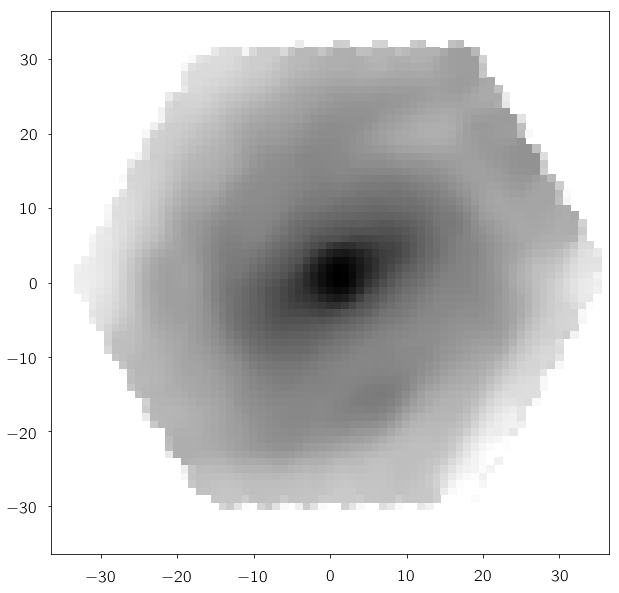

In [26]:
fig, ax = plt.subplots(1, 1, figsize = (10,10))
cs1 = ax.pcolormesh(x_ax,x_ax,number,norm = colors.LogNorm(), cmap = plt.cm.Greys)
l = np.append(radii,37)
cs2 = ax.contour(x_ax,x_ax,s, levels = l, cmap = plt.cm.Blues)
fmt = {}
strs = [r'$z$', '0.06','0.1','0.14','0.5','Full Aperture']
for l,t in zip(cs2.levels, strs ):
    fmt[l] = t
plt.clabel(cs2, fontsize = 15, fmt = fmt)
plt.xlim(-37,37)
plt.ylim(-37,37)
plt.xlabel('Spaxel space')
plt.ylabel('Spaxel space')
cbar_ax = fig.add_axes([0.13, 0.93, 0.75, 0.01])
cb = fig.colorbar(cs1,orientation = 'horizontal', cax=cbar_ax)
cb.ax.xaxis.set_ticks_position('top')
cb.ax.tick_params(labelsize=13)
fig.text(0.5, 0.9, r'\textit{(Total flux from each spaxel)}', 
         ha='center', va='center', fontsize = 15)
plt.savefig('/Users/Nitya/Desktop/gal_aperture_redshifts.pdf')
plt.show()

In [ ]:
def get_dn4000(wave,spec):
    interp_spec = interp.interp1d(wave,spec)
    blue_wav = np.linspace(3850,3950,100)
    red_wav = np.linspace(4000,4100,100)
    d4000 = np.sum(interp_spec(red_wav)) / np.sum(interp_spec(blue_wav))
    return d4000

def get_HdA(wave,spec):
    bandw_HdA = np.logical_and(wave > 4083.500, wave < 4122.250)   # analogous to MPA-JHU
    bandw_HdA_blueside = np.logical_and(wave > 4041.600, wave < 4079.750)
    bandw_HdA_redside = np.logical_and(wave > 4128.500, wave < 4161.000)
    spec_av_blueside = np.sum(spec[bandw_HdA_blueside])/len(spec[bandw_HdA_blueside])
    spec_av_redside = np.sum(spec[bandw_HdA_redside])/len(spec[bandw_HdA_redside])
    a_spec = (spec_av_redside - spec_av_blueside)/((4161.000+4128.500)/2 - (4079.750+4041.600)/2)
    b_spec = spec_av_blueside - a_spec * (4079.750+4041.600)/2
    spec_cont_HdA = wave[bandw_HdA] * a_spec + b_spec
    HdA = tsum(wave[bandw_HdA],np.divide((spec_cont_HdA - spec[bandw_HdA]), spec_cont_HdA))
    return HdA

